# libROSA
## https://librosa.github.io/librosa
<br>
<br>

``$ jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000``

In [11]:
import librosa

import librosa.display
import matplotlib.pyplot as plt

In [12]:
recording = '../audio/rec.wav'

## Reading an audio file and converting it to a time-series

In [13]:
import IPython.display as ipd
ipd.Audio(recording)

## Signal time domain series

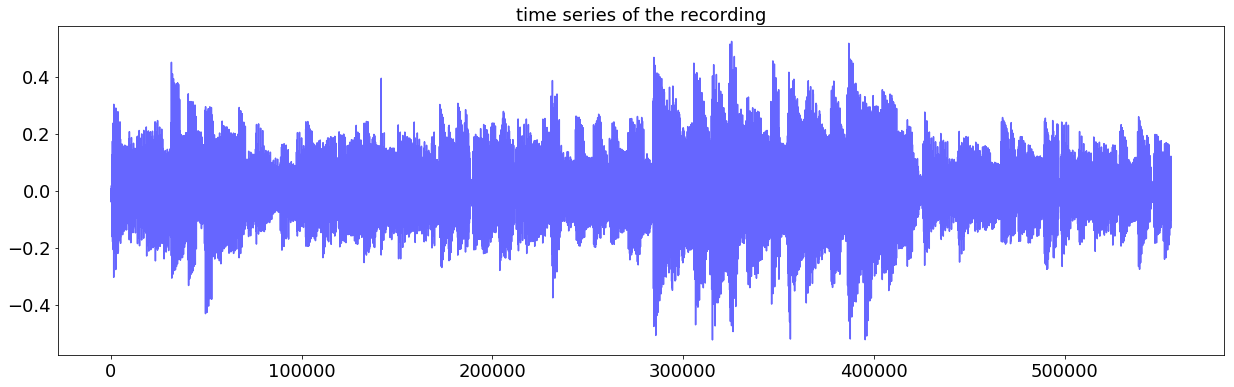

In [6]:
y, sr = librosa.load(recording)

# plotting...
font_size = 18
plt.figure(1)
plt.figure(1).set_size_inches(18,6)
plt.figure(1).subplots_adjust(left=0.05, bottom=0.14, right=0.95, top=0.9, wspace=0.2, hspace=0.5)
plt.plot(y, color='blue', alpha=0.6)
plt.title('time series of the recording', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

## Audio features

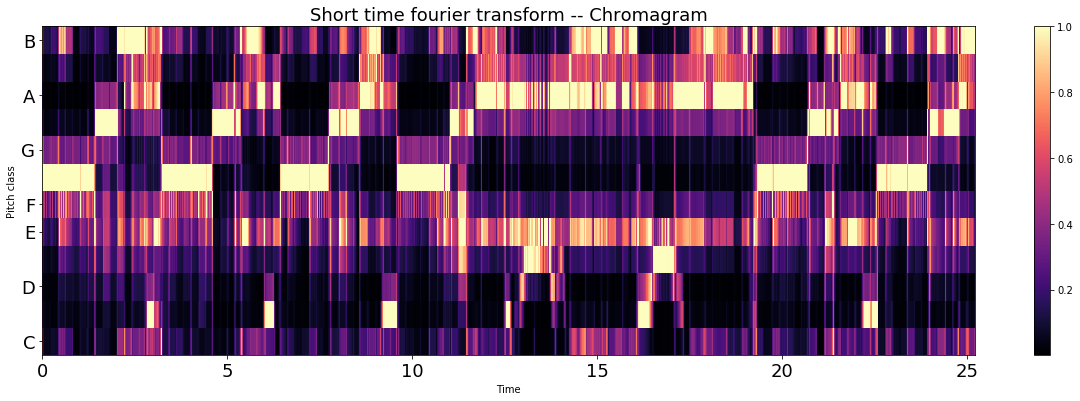

In [7]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# plotting...
plt.figure(2)
plt.figure(2).set_size_inches(18,6)
plt.figure(2).subplots_adjust(left=0.05, bottom=0.14, right=0.95, top=0.9, wspace=0.2, hspace=0.6)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.title('Short time fourier transform -- Chromagram', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.colorbar()
plt.show()

## Similarity and repetitions

Tempo:  151.999080882 BPM


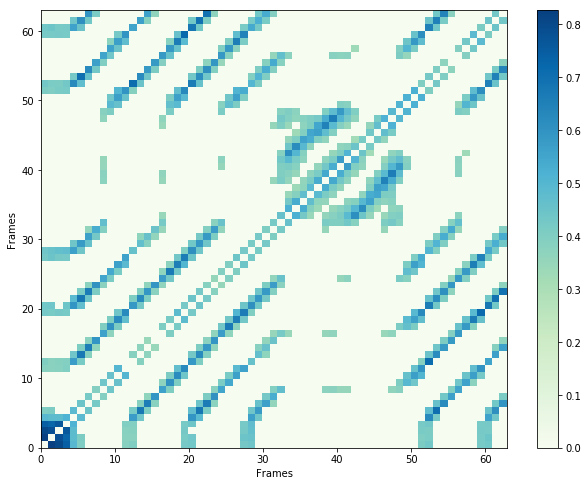

In [10]:
# onset envelope on y
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

# tempo and beat detection on onset_env
tempo, beats = librosa.beat.beat_track(y=y, sr=sr, onset_envelope=onset_env, trim=False)
print ('Tempo: ', tempo, 'BPM')

# stft on y
stft = librosa.feature.chroma_stft(y=y, sr=sr)

# sync beats with stft
sync = librosa.util.sync(stft, beats)
chroma_stack = librosa.feature.stack_memory(sync, n_steps=5, mode='edge')

# similarity matrix of synced data
S = librosa.segment.recurrence_matrix(chroma_stack, sym=True, mode='affinity')

# plotting...
plt.figure(3)
plt.figure(3).set_size_inches(9,8)
plt.figure(3).subplots_adjust(left=0.05, bottom=0.14, right=0.95, top=0.9, wspace=0.2, hspace=0.6)
librosa.display.specshow(S, cmap='GnBu', x_axis='frames' , y_axis='frames')
plt.colorbar()
plt.show()